In [2]:
pip install pandas matplotlib openpyxl


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
df = pd.read_excel("superstore.xlsx", sheet_name='Task_1')
print(df.head())


   ROW_ID        ORDER_ID  ORDER_DATE   SHIP_DATE       SHIP_MODE CUSTOMER_ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     CUSTOMER_NAME    SEGMENT        COUNTRY             CITY       STATE  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

  POSTAL_CODE REGION       PRODUCT_ID         CATE

In [4]:

df = df[['PRODUCT_NAME', 'ORDER_ID', 'SALES']]


df.rename(columns={'PRODUCT_NAME': 'product', 'ORDER_ID': 'orders', 'SALES': 'sales'}, inplace=True)

print(df.head())


                                             product          orders     sales
0                  Bush Somerset Collection Bookcase  CA-2017-152156  261.9600
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  CA-2017-152156  731.9400
2  Self-Adhesive Address Labels for Typewriters b...  CA-2017-138688   14.6200
3      Bretford CR4500 Series Slim Rectangular Table  US-2016-108966  957.5775
4                     Eldon Fold 'N Roll Cart System  US-2016-108966   22.3680


In [5]:
import sqlite3


conn = sqlite3.connect("sales.db")


df.to_sql("sales", conn, if_exists='replace', index=False)

print("Data saved to SQLite database!")


Data saved to SQLite database!


In [6]:

query = """
SELECT product,
       SUM(orders) AS total_order,
       SUM(sales) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC
LIMIT 10
"""


summary_df = pd.read_sql_query(query, conn)


conn.close()


print("Top 10 Products by Revenue:")
print(summary_df)


Top 10 Products by Revenue:
                                             product  total_order    revenue
0              Canon imageCLASS 2200 Advanced Copier          0.0  61599.824
1  Fellowes PB500 Electric Punch Plastic Comb Bin...          0.0  27453.384
2  Cisco TelePresence System EX90 Videoconferenci...          0.0  22638.480
3       HON 5400 Series Task Chairs for Big and Tall          0.0  21870.576
4         GBC DocuBind TL300 Electric Binding System          0.0  19823.479
5   GBC Ibimaster 500 Manual ProClick Binding System          0.0  19024.500
6               Hewlett Packard LaserJet 3310 Copier          0.0  18839.686
7  HP Designjet T520 Inkjet Large Format Printer ...          0.0  18374.895
8          GBC DocuBind P400 Electric Binding System          0.0  17965.068
9        High Speed Automatic Electric Letter Opener          0.0  17030.312


Matplotlib is building the font cache; this may take a moment.
/tmp/ipykernel_551/6921660.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


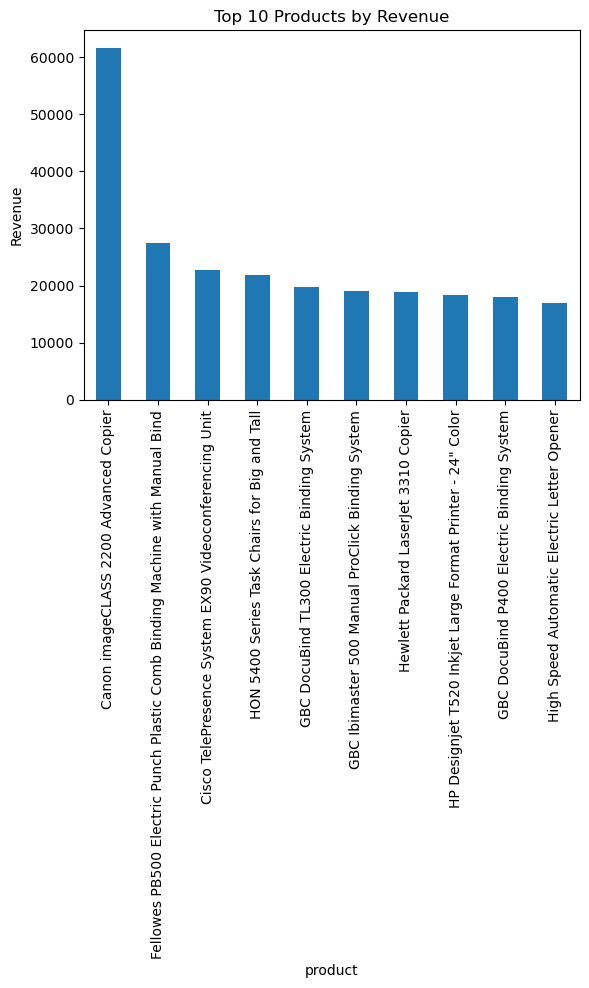

In [7]:
import matplotlib.pyplot as plt


summary_df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Top 10 Products by Revenue")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("superstore_sales_chart.png")  
plt.show()
